In [11]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [12]:
class BatsmanState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int
    strike_rate:float
    runs_in_boundary:float
    balls_per_boundary:float
    Summary:str

In [13]:
def Strike_rate(state:BatsmanState)->dict:
    runs_scored=state["runs"]
    balls_faced=state["balls"]
    strike_rate=(runs_scored/balls_faced)*100
    
    return {"strike_rate":strike_rate}


def Runs_In_Boundary_percentage(state:BatsmanState)->dict:
    runs_scored=state["runs"]
    fours_scored=state["fours"]
    sixes_scored=state["sixes"]
    runs_in_boundary=((fours_scored*4+sixes_scored*6)/runs_scored)*100
    
    return {"runs_in_boundary":runs_in_boundary}


def Balls_Per_Boundary(state:BatsmanState)->dict:
    balls_faced=state["balls"]
    fours_scored=state["fours"]
    sixes_scored=state["sixes"]
    balls_per_boundary=balls_faced/(fours_scored+sixes_scored)
    
    return {"balls_per_boundary":balls_per_boundary}


def Summary(state:BatsmanState)->dict:
    Summary=f"The Batsman have {state["strike_rate"]} strike rate ,{state["balls_per_boundary"]} balls per boundary and {state["runs_in_boundary"]}% runs in boundary percentage"
    return {"Summary":Summary}

In [14]:
graph=StateGraph(BatsmanState)

graph.add_node("Strike_rate",Strike_rate)
graph.add_node("Runs_In_Boundary_percentage",Runs_In_Boundary_percentage)
graph.add_node("Balls_Per_Boundary",Balls_Per_Boundary)
graph.add_node("Summary",Summary)

graph.add_edge(START,"Strike_rate")
graph.add_edge(START,"Runs_In_Boundary_percentage")
graph.add_edge(START,"Balls_Per_Boundary")

graph.add_edge("Strike_rate","Summary")
graph.add_edge("Runs_In_Boundary_percentage","Summary")
graph.add_edge("Balls_Per_Boundary","Summary")

graph.add_edge("Summary",END)

workflow=graph.compile()


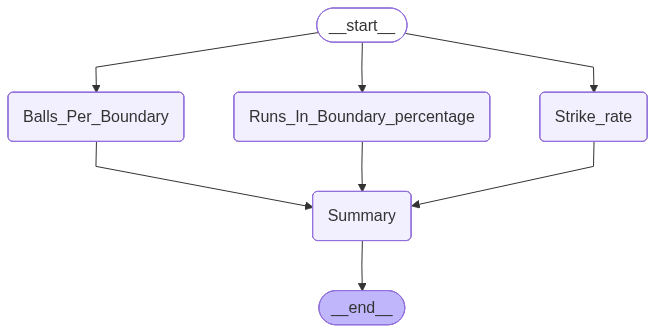

In [15]:
workflow

In [17]:
workflow.invoke({"balls":50,"runs":100,"fours":6,"sixes":4})

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'strike_rate': 200.0,
 'runs_in_boundary': 48.0,
 'balls_per_boundary': 5.0,
 'Summary': 'The Batsman have 200.0 strike rate ,5.0 balls per boundary and 48.0% runs in boundary percentage'}